# Traffic on the I-94 Interstate Highway
We are going to analyze a dataset about the westbound traffic on the I-94 Intersate Highway.
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [283]:
# Importing all the modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [284]:
df = pd.read_csv('./data_sets/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [285]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<Axes: ylabel='Frequency'>

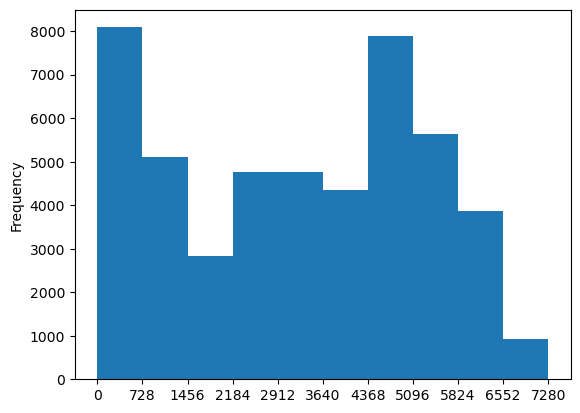

In [287]:
bins = np.linspace(df['traffic_volume'].min(),df['traffic_volume'].max(),11,endpoint=True)
df['traffic_volume'].plot.hist(xticks=bins)

In [288]:
df['traffic_volume'].value_counts(bins=10).sort_index()

traffic_volume
(-7.281000000000001, 728.0]    8095
(728.0, 1456.0]                5100
(1456.0, 2184.0]               2835
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(5824.0, 6552.0]               3854
(6552.0, 7280.0]                925
Name: count, dtype: int64

In [289]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# Traffic volume vs the time of the day

In [291]:
# Converting date_time column to datetime object type

df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [292]:
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
#df['hour'] = df['time'].astype(str).str.split(':').str[0].astype(int)
df['hour'] = df['date_time'].dt.hour
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time,hour,month,year
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00,9,10,2012
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00,10,10,2012
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00,11,10,2012
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00,12,10,2012
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00,13,10,2012


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   date                 48204 non-null  object        
 10  time                 48204 non-null  object        
 11  hour                 48204 non-null  int32         
 12  month                48204 non-null  int32         
 13  year                 48204 non-

In [294]:
# get weekday from date_time, 0 is Monday and 6 is Sunday
df['weekday'] = df['date_time'].dt.dayofweek
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time,hour,month,year,weekday
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00,9,10,2012,1
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00,10,10,2012,1
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00,11,10,2012,1
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00,12,10,2012,1
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00,13,10,2012,1


In [295]:
by_hour = df[['weekday','hour','traffic_volume']]
by_hour = by_hour.groupby(['weekday','hour']).mean()['traffic_volume'].reset_index()
by_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   weekday         168 non-null    int32  
 1   hour            168 non-null    int32  
 2   traffic_volume  168 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 2.8 KB


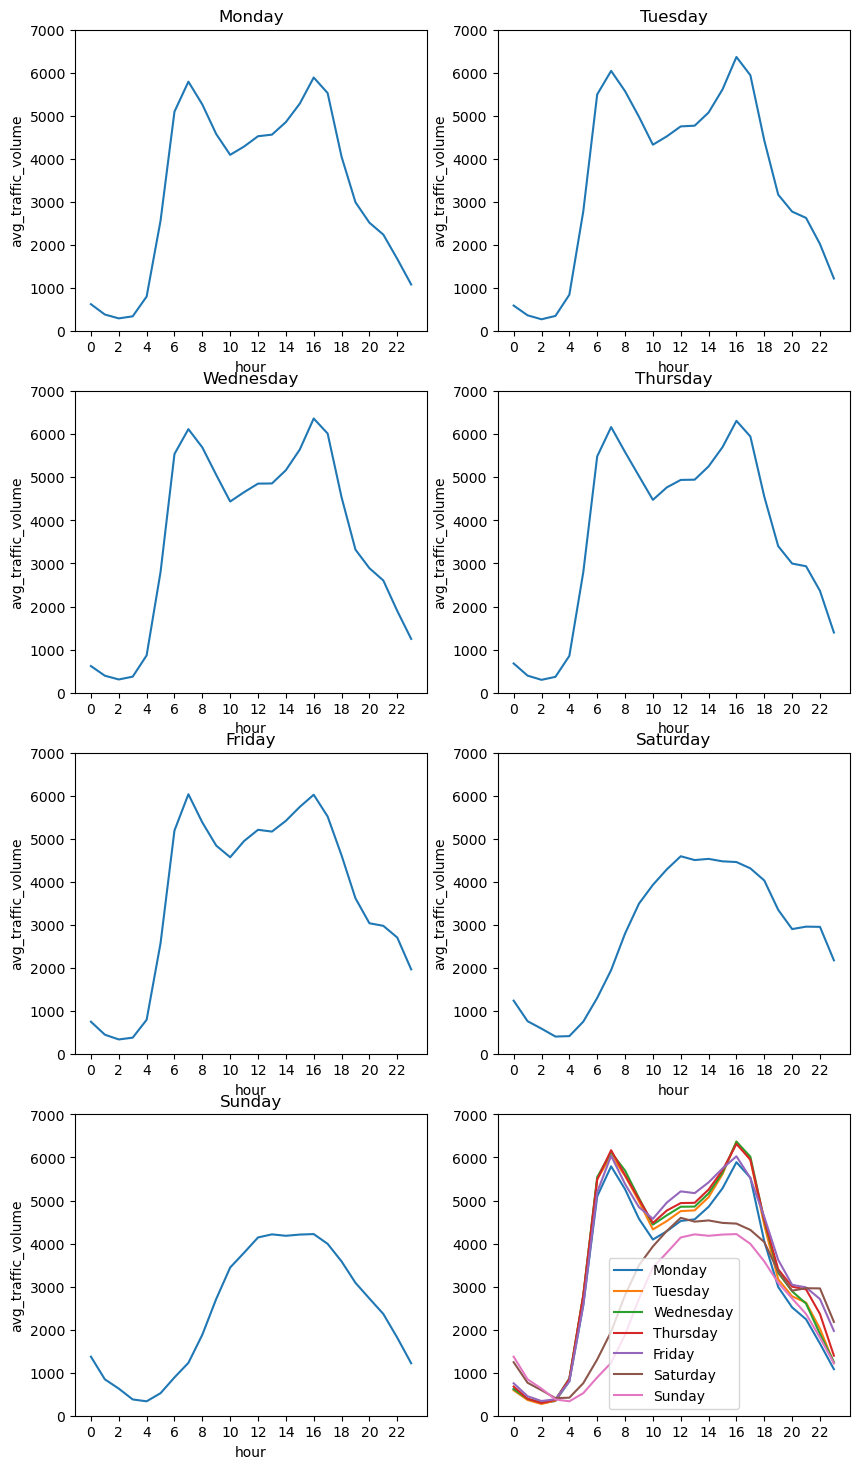

In [296]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,18))
for i,day in zip(range(7),days):
    plt.subplot(4,2,i+1)
    plt.plot(by_hour[by_hour['weekday']==i]['hour'],by_hour[by_hour['weekday']==i]['traffic_volume'])
    plt.title(day)
    plt.xticks(range(0,24,2))
    plt.xlabel('hour')
    plt.ylabel('avg_traffic_volume')
    plt.ylim([0,7000])
plt.subplot(4,2,8)
for i,day in zip(range(7),days):
    plt.plot(by_hour[by_hour['weekday']==i]['hour'],by_hour[by_hour['weekday']==i]['traffic_volume'],label = day)
plt.legend()
plt.ylim([0,7000])
plt.xticks(range(0,24,2))
plt.show()


### Traffic is highest during the daytime period from 5am till 7pm on weekdays (Mon - Fri).
Saturday and Sunday traffic has a different distribution compared to weekdays

In [298]:
df_weekday = df.loc[(df['weekday'] >=0) & (df['weekday'] <=4),['hour','traffic_volume']]
df_weekday['traffic_volume'].describe()

count    34501.000000
mean      3533.596794
std       2074.133602
min          1.000000
25%       1448.000000
50%       4095.000000
75%       5290.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# Traffic volume vs Month
We will look at peak traffic hours only (5am - 7pm).

<Axes: xlabel='month'>

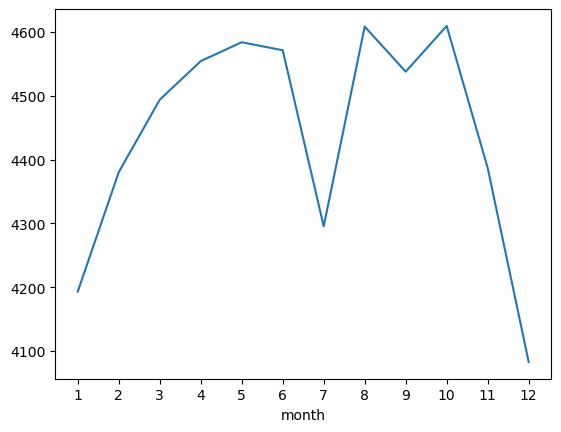

In [300]:
# Weekdays during peak traffic hours 5am - 7pm
df_peak = df.loc[(df['hour'] >=5) & (df['hour'] <=19),:]
by_month = df_peak.groupby(['month']).mean(numeric_only=True)['traffic_volume']
by_month.plot.line(xticks=range(1,13))

#### Warmer months Mar - Oct show higher traffic compared to coder months from Nov-Feb. But July is exceptionally low amongst warmer months.
what is going on with July? Let's check how July traffic looks across years.

<Axes: xlabel='year'>

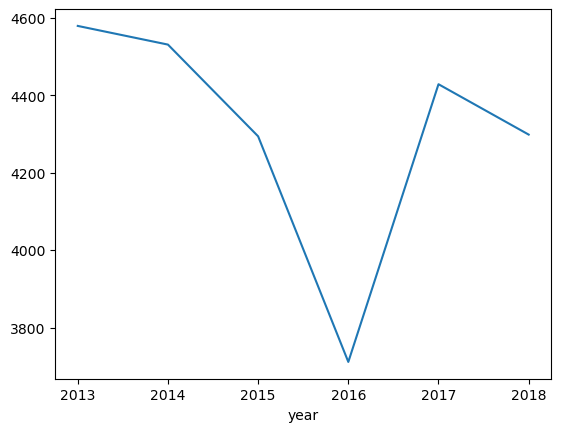

In [302]:
df_july = df_peak[df_peak['month'] == 7]
df_july.groupby('year').mean(numeric_only=True)['traffic_volume'].plot.line()

Lower traffic in July during 2016 could be due to road construction.

In [304]:
# Weekdays
by_month_hour = df_peak.loc[(df['weekday'] >=0) & (df['weekday'] <=4),:]
by_month_hour = by_month_hour.groupby(['month','hour']).mean(numeric_only=True)['traffic_volume'].reset_index()
by_month_hour['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

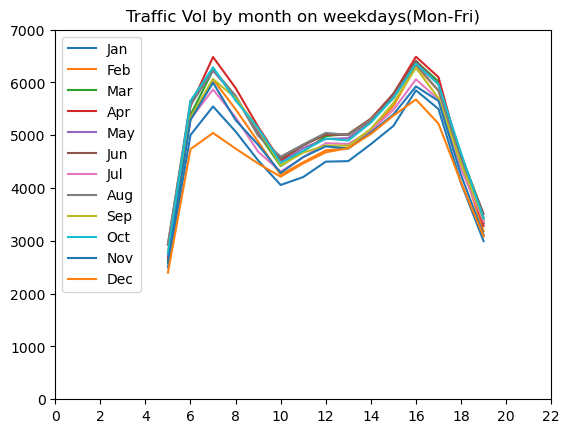

In [305]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i,month in zip(range(1,13),months):
    plt.plot(by_month_hour[by_month_hour['month']==i]['hour'],by_month_hour[by_month_hour['month']==i]['traffic_volume'],label = month)
plt.legend()
plt.title('Traffic Vol by month on weekdays(Mon-Fri)')
plt.ylim([0,7000])
plt.xticks(range(0,24,2))
plt.show()


### Traffic volume on weekdays looks very similar across all months with December having lower traffic.

In [307]:
# Weekends
by_month_weekend = df_peak.loc[(df['weekday'] == 5) | (df['weekday'] ==6),:]
by_month_weekend = by_month_weekend.groupby(['month','hour']).mean(numeric_only=True)['traffic_volume'].reset_index()
by_month_weekend['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

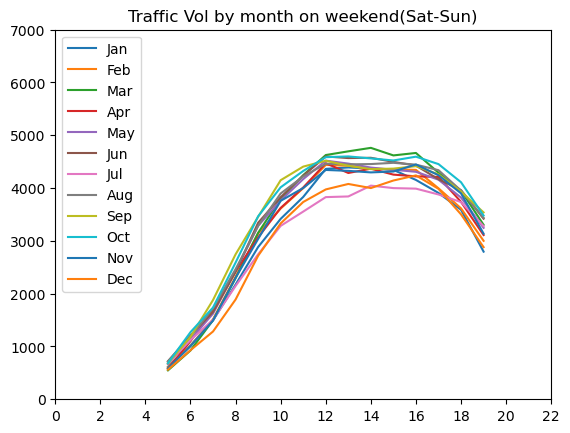

In [308]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i,month in zip(range(1,13),months):
    plt.plot(by_month_weekend[by_month_weekend['month']==i]['hour'],by_month_weekend[by_month_weekend['month']==i]['traffic_volume'],label = month)
plt.legend()
plt.title('Traffic Vol by month on weekend(Sat-Sun)')
plt.ylim([0,7000])
plt.xticks(range(0,24,2))
plt.show()


### Traffic volume on weekend looks very similar across all months.

### Summary of time indicators
1. Traffic is highest during the daytime period from 5am till 7pm on weekdays (Mon - Fri). 
2. Weekend (Sat-Sun) traffic volume shows completely different distribution compared to weekdays and is lower than weekdays.
3. Warmer months Mar-Oct show higher traffic compared to coder months from Nov-Feb. But July is exceptionally low amongst warmer months. This comes from exceptionally low traffic in July, 2016 possibly due to road construction.
4. Traffic volume on weekend looks very similar acroos all months.

# Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.
A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [312]:
df_peak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29988 entries, 0 to 48199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              0 non-null      object        
 1   temp                 29988 non-null  float64       
 2   rain_1h              29988 non-null  float64       
 3   snow_1h              29988 non-null  float64       
 4   clouds_all           29988 non-null  int64         
 5   weather_main         29988 non-null  object        
 6   weather_description  29988 non-null  object        
 7   date_time            29988 non-null  datetime64[ns]
 8   traffic_volume       29988 non-null  int64         
 9   date                 29988 non-null  object        
 10  time                 29988 non-null  object        
 11  hour                 29988 non-null  int32         
 12  month                29988 non-null  int32         
 13  year                 29988 non-null 

In [313]:
df_peak.corr(numeric_only=True)['traffic_volume']

temp              0.132358
rain_1h           0.003717
snow_1h           0.005801
clouds_all        0.002526
traffic_volume    1.000000
hour              0.225011
month            -0.009933
year              0.004982
weekday          -0.382687
Name: traffic_volume, dtype: float64

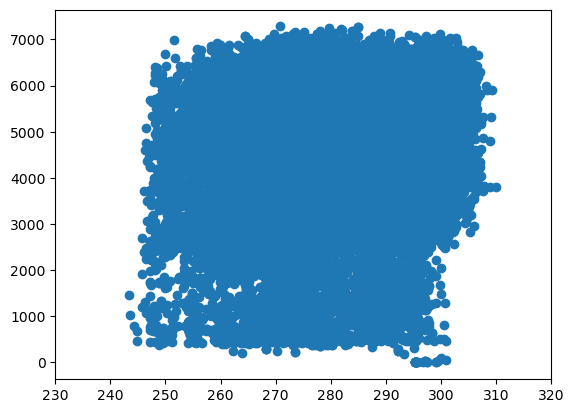

In [314]:
plt.scatter(x=df_peak['temp'], y=df_peak['traffic_volume'])
plt.xlim([230,320])
plt.show()

#### We can conclude that temperature is not a strong indicator of heavy traffic.
Now, let's look at the other two categorical weather columns: weather_main and weather_description

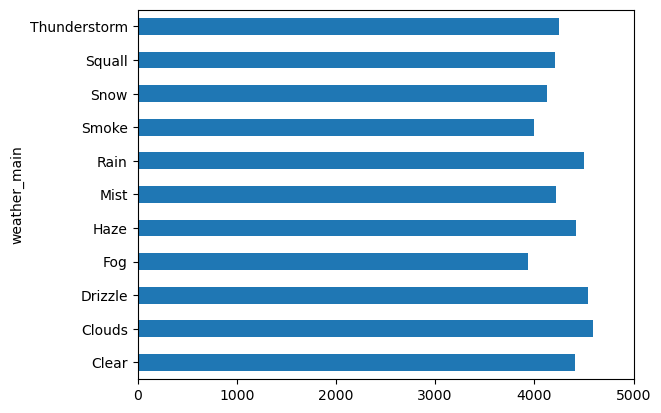

In [316]:
by_weather_main = df_peak.groupby('weather_main').mean(numeric_only=True)['traffic_volume'].plot.barh()
plt.xlim([0,5000])
plt.show()



#### Looks like there are no clear indicators based on weather_main column. No weather type exceeds 5000 avg traffic_volume.

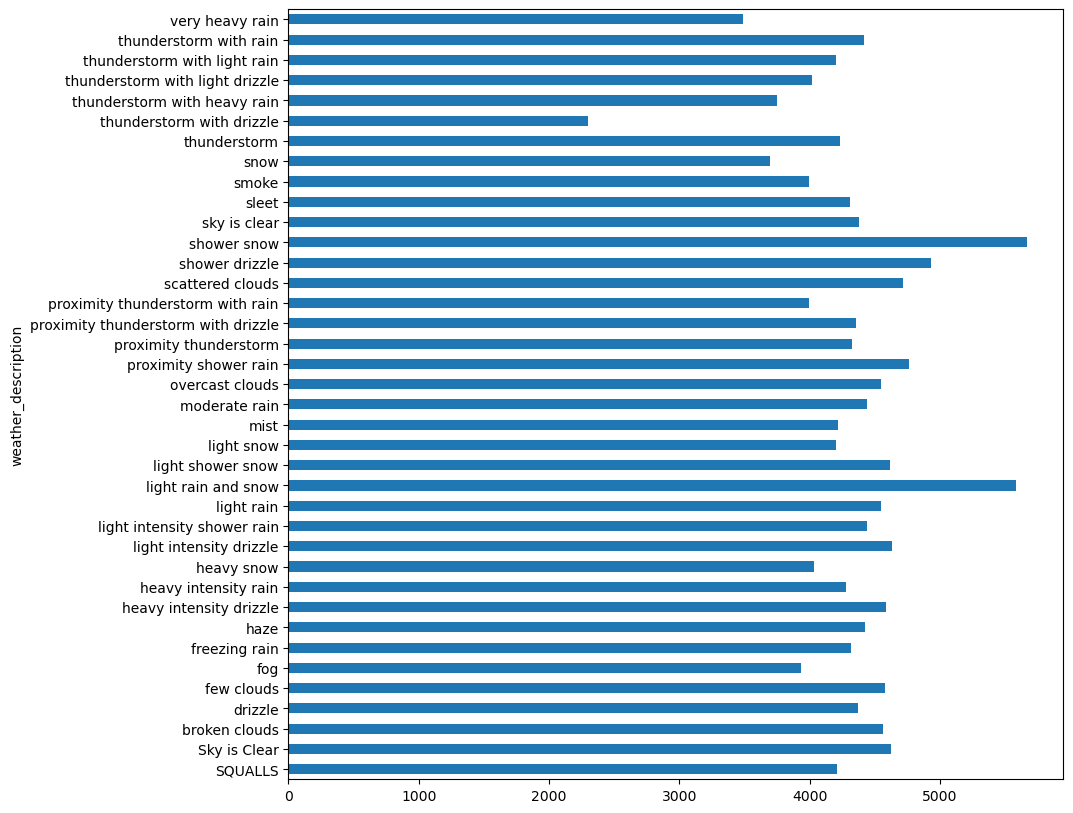

In [318]:

by_weather_desc = df_peak.groupby('weather_description').mean(numeric_only=True)['traffic_volume']
by_weather_desc.plot.barh(figsize=(10,10))
plt.show()


In [319]:
by_weather_desc.sort_values()

weather_description
thunderstorm with drizzle              2297.000000
very heavy rain                        3486.727273
snow                                   3696.540230
thunderstorm with heavy rain           3747.416667
fog                                    3932.828780
proximity thunderstorm with rain       3992.300000
smoke                                  3992.333333
thunderstorm with light drizzle        4021.333333
heavy snow                             4030.735661
light snow                             4203.885477
thunderstorm with light rain           4204.107143
SQUALLS                                4211.000000
mist                                   4217.182920
thunderstorm                           4235.985714
heavy intensity rain                   4275.343434
sleet                                  4312.666667
freezing rain                          4314.000000
proximity thunderstorm                 4325.821883
proximity thunderstorm with drizzle    4356.000000
drizzle    

#### Following weather conditions are heavy traffic indicators:
1. shower snow
2. light rain and snow
3. shower drizzle

These are bad weather conditions but not as bad as some other like heavy snow, very heavy rain etc. The reason why the heavy traffic indicators are mildly bad weather conditions is possibly because people tend to take less caution when the weather is not very bad. If the weather is very bad, less people are on the road but in mildy bad conditions with little rain, roads are slippery but the drivers are not very cautious.

# Conclusion
In this project we tried to find indicators of heavy traffic on I-94 Interstate Highway. We found two types of indicators:
- Time Indicators
    1. Traffic is highest during the daytime period from 5am till 7pm on weekdays (Mon - Fri).
    2. Weekend (Sat-Sun) traffic volume shows completely different distribution compared to weekdays and is lower than weekdays.
    3. Warmer months Mar-Oct show higher traffic compared to coder months from Nov-Feb. But July is exceptionally low amongst warmer months. This comes from exceptionally low traffic in July, 2016 possibly due to road construction.
    4. Traffic volume on weekend looks very similar acroos all months.
- Weather Indicators
    1. shower snow
    2. light rain and snow
    3. shower drizzle